In [0]:
!wget --no-check-certificate \
    -O /tmp/reviews.tar.gz 'https://drive.google.com/uc?export=download&id=167PTcrVMxFlYjA9_8Hiccie_T3JsfSV1'

In [0]:
!tar xvzf  '/tmp/reviews.tar.gz'

Reviews/
Reviews/._Y.txt
Reviews/Y.txt
Reviews/._N.txt
Reviews/N.txt


In [0]:
!ls Reviews

In [0]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds

import numpy as np
import pandas as pd  
import random


In [0]:
with open('Reviews/Y.txt') as y:
    yes = list(map(lambda x: ({'text': x,'sentiment': 1}),y.readlines()))

with open('Reviews/N.txt') as n:
    no = list(map(lambda x: ({'text': x,'sentiment': 0}),n.readlines()))
data = yes + no
random.shuffle(data)
dataset = pd.DataFrame(data) 

sentences = dataset['text'].tolist()
labels = dataset['sentiment'].tolist()

for x in range(2):
  print(sentences[x])
  print(labels[x])
  print("\n")


vocab_size = 30000
tokenizer = tfds.features.text.SubwordTextEncoder.build_from_corpus(sentences, vocab_size, max_subword_length=5)

# How big is the vocab size?
print("Vocab size is ", tokenizer.vocab_size)


Good story rhymes

1


Amazing One Of The Best Puzzle Games That I Played This Is Challenges My Head And Makes Me Smarter

1


Vocab size is  23357


In [0]:
num = 5
print(sentences[num])
encoded = tokenizer.encode(sentences[num])
print(encoded)

# Separately print out each subword, decoded
for i in encoded:
  print(tokenizer.decode([i]))

for i, sentence in enumerate(sentences):
  sentences[i] = tokenizer.encode(sentence)

# Check the sentences are appropriately replaced
print(sentences[5])


import numpy as np

max_length = 50
trunc_type='post'
padding_type='post'

# Pad all sequences
sequences_padded = pad_sequences(sentences, maxlen=max_length, 
                                 padding=padding_type, truncating=trunc_type)

# Separate out the sentences and labels into training and test sets
training_size = int(len(sentences) * 0.8)

training_sequences = sequences_padded[0:training_size]
testing_sequences = sequences_padded[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

Total bs I had 4 aces and still..... Lost

[909, 23133, 4764, 3, 156, 277, 9774, 5, 145, 181, 23133, 20090, 23111]
Total
 
bs 
I 
had 
4 
aces 
and 
still
.....
 
Lost


[909, 23133, 4764, 3, 156, 277, 9774, 5, 145, 181, 23133, 20090, 23111]


In [0]:
embedding_dim = 16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, 
                                                       return_sequences=True)), 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            480000    
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 32)            4224      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense (Dense)                (None, 6)                 198       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 490,701
Trainable params: 490,701
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epochs = 30
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(training_sequences, training_labels_final, epochs=num_epochs, validation_data=(testing_sequences, testing_labels_final))

Epoch 1/30
495/495 [==============================] - 32s 64ms/step - loss: 0.4111 - accuracy: 0.8127 - val_loss: 0.2702 - val_accuracy: 0.8920
Epoch 2/30
495/495 [==============================] - 31s 63ms/step - loss: 0.1968 - accuracy: 0.9292 - val_loss: 0.2793 - val_accuracy: 0.8902
Epoch 3/30
495/495 [==============================] - 30s 61ms/step - loss: 0.1360 - accuracy: 0.9557 - val_loss: 0.3094 - val_accuracy: 0.8880
Epoch 4/30
495/495 [==============================] - 30s 61ms/step - loss: 0.1029 - accuracy: 0.9675 - val_loss: 0.3391 - val_accuracy: 0.8864
Epoch 5/30
495/495 [==============================] - 30s 61ms/step - loss: 0.0843 - accuracy: 0.9744 - val_loss: 0.3917 - val_accuracy: 0.8854
Epoch 6/30
495/495 [==============================] - 30s 61ms/step - loss: 0.0768 - accuracy: 0.9767 - val_loss: 0.3807 - val_accuracy: 0.8821
Epoch 7/30
495/495 [==============================] - 30s 61ms/step - loss: 0.0662 - accuracy: 0.9812 - val_loss: 0.4241 - val_accuracy:

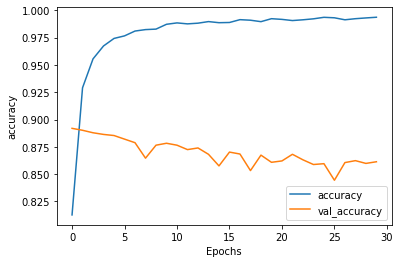

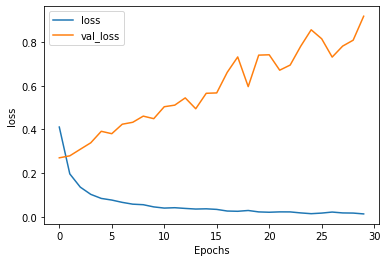

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [0]:
# Define a function to take a series of reviews
# and predict whether each one is a positive or negative review

# max_length = 100 # previously defined

def predict_review(model, new_sentences, maxlen=max_length, show_padded_sequence=True ):
  # Keep the original sentences so that we can keep using them later
  # Create an array to hold the encoded sequences
  new_sequences = []

  # Convert the new reviews to sequences
  for i, frvw in enumerate(new_sentences):
    new_sequences.append(tokenizer.encode(frvw))

  trunc_type='post' 
  padding_type='post'

  # Pad all sequences for the new reviews
  new_reviews_padded = pad_sequences(new_sequences, maxlen=max_length, 
                                 padding=padding_type, truncating=trunc_type)             

  classes = model.predict(new_reviews_padded)

  # The closer the class is to 1, the more positive the review is
  for x in range(len(new_sentences)):
    
    # We can see the padded sequence if desired
    # Print the sequence
    # if (show_padded_sequence):
      # print(new_reviews_padded[x])
    # Print the review as text
    print(new_sentences[x])
    # Print its predicted class
    print(classes[x])
    # print("\n")

In [0]:
# Use the model to predict a review   
fake_reviews = ['i love this game', 
                'I dont like this app', 
                'Everything works like charm in this game',
                'Funtastic graphics', 
                'I don\'t like this game',
                'this game is so boring',
                'This game sucks',
                'not that accurate',
                'not so fun',
                'so happy to have this game',
                'mad']

predict_review(model, fake_reviews)

i love this game
[0.92471886]
I dont like this app
[0.3410625]
Everything works like charm in this game
[0.9999315]
Funtastic graphics
[0.1251311]
I don't like this game
[0.55787355]
this game is so boring
[0.00091165]
This game sucks
[0.0004538]
not that accurate
[0.0036929]
not so fun
[0.00278167]
so happy to have this game
[0.9797364]
mad
[0.00012819]
